# Regularization
Below is a step-by-step Python tutorial for regression analysis using a dataset, demonstrating linear regression, polynomial regression, and regularization techniques (Ridge, Lasso, Elastic Net) to handle overfitting.

## Setup
You can either use a real dataset or generate a dummy dataset for this tutorial. For simplicity, let's create a dummy dataset using NumPy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Generating a dummy dataset
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = -5*X + X**2 + np.random.normal(0, 0.5, X.shape[0]).reshape(-1, 1)

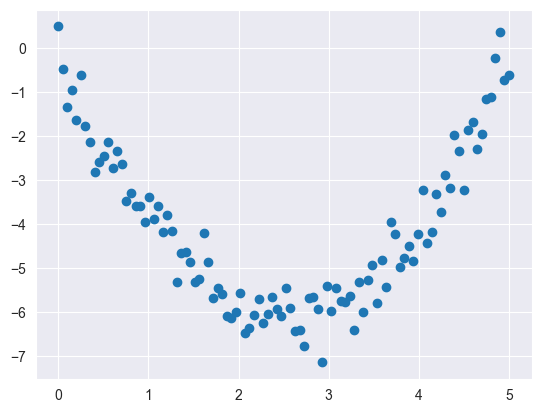

In [3]:
plt.scatter(X, y)

## Linear Regression
Let's start with linear regression to see how well it fits the data.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred)
linear_r2_test = r2_score(y_test, y_test_pred)
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression:")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")


Linear Regression:
Training R-squared: 0.0005, Training MSE: 3.6044
Testing R-squared: -0.0506, Testing MSE: 2.7750


## Polynomial Regression with Degree of 2
Now, let's perform polynomial regression with a degree of 2 to capture more complex relationships in the data.

In [5]:
# Transform the features to include polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the polynomial features into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions on training and testing data
y_train_pred_poly = poly_model.predict(X_poly_train)
y_test_pred_poly = poly_model.predict(X_poly_test)

# Calculate R-squared and mean squared error for evaluation
poly_r2_train = r2_score(y_train, y_train_pred_poly)
poly_r2_test = r2_score(y_test, y_test_pred_poly)
poly_mse_train = mean_squared_error(y_train, y_train_pred_poly)
poly_mse_test = mean_squared_error(y_test, y_test_pred_poly)

print(f"\nPolynomial Regression (Degree 2):")
print(f"Training R-squared: {poly_r2_train:.4f}, Training MSE: {poly_mse_train:.4f}")
print(f"Testing R-squared: {poly_r2_test:.4f}, Testing MSE: {poly_mse_test:.4f}")


Polynomial Regression (Degree 2):
Training R-squared: 0.9477, Training MSE: 0.1886
Testing R-squared: 0.8769, Testing MSE: 0.3251


## Polynomial Regression with higher Degree
Next, let's perform polynomial regression with a higher degree to observe overfitting. The training result is better than the testing result.

In [6]:
# Transform the features to include polynomial features of higher
degree = 21
poly_high_degree = PolynomialFeatures(degree=degree)
X_poly_high_degree = poly_high_degree.fit_transform(X)

# Split the high-degree polynomial features into training and testing sets
X_poly_high_degree_train, X_poly_high_degree_test, y_train, y_test = train_test_split(
    X_poly_high_degree, y, test_size=0.2, random_state=0)

# Create and fit the high-degree polynomial regression model
poly_model_high_degree = LinearRegression()
poly_model_high_degree.fit(X_poly_high_degree_train, y_train)

# Make predictions on training and testing data
y_train_pred_high_degree = poly_model_high_degree.predict(X_poly_high_degree_train)
y_test_pred_high_degree = poly_model_high_degree.predict(X_poly_high_degree_test)

# Calculate R-squared and mean squared error for evaluation
poly_r2_train_high_degree = r2_score(y_train, y_train_pred_high_degree)
poly_r2_test_high_degree = r2_score(y_test, y_test_pred_high_degree)
poly_mse_train_high_degree = mean_squared_error(y_train, y_train_pred_high_degree)
poly_mse_test_high_degree = mean_squared_error(y_test, y_test_pred_high_degree)

print(f"\nPolynomial Regression (Degree {degree}):")
print(f"Training R-squared: {poly_r2_train_high_degree:.4f}, Training MSE: {poly_mse_train_high_degree:.4f}")
print(f"Testing R-squared: {poly_r2_test_high_degree:.4f}, Testing MSE: {poly_mse_test_high_degree:.4f}")



Polynomial Regression (Degree 21):
Training R-squared: 0.8640, Training MSE: 0.4905
Testing R-squared: 0.7977, Testing MSE: 0.5344


## Regularization (Ridge, Lasso, Elastic Net)
Finally, let's introduce regularization techniques to mitigate overfitting in the high-degree polynomial regression.

In [7]:
# Regularization strengths
alpha_ridge = 0.001
alpha_lasso = 0.001
alpha_elasticnet = 0.001
l1_ratio_elasticnet = 0.5

# Create and fit the Ridge, Lasso, and ElasticNet regression models
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_poly_high_degree_train, y_train)

lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_poly_high_degree_train, y_train)

elasticnet_model = ElasticNet(alpha=alpha_elasticnet, l1_ratio=l1_ratio_elasticnet)
elasticnet_model.fit(X_poly_high_degree_train, y_train)

# Make predictions on training and testing data for all regularized models
y_train_pred_ridge = ridge_model.predict(X_poly_high_degree_train)
y_test_pred_ridge = ridge_model.predict(X_poly_high_degree_test)

y_train_pred_lasso = lasso_model.predict(X_poly_high_degree_train)
y_test_pred_lasso = lasso_model.predict(X_poly_high_degree_test)

y_train_pred_elasticnet = elasticnet_model.predict(X_poly_high_degree_train)
y_test_pred_elasticnet = elasticnet_model.predict(X_poly_high_degree_test)

# Calculate R-squared and mean squared error for evaluation
ridge_r2_train = r2_score(y_train, y_train_pred_ridge)
ridge_r2_test = r2_score(y_test, y_test_pred_ridge)
ridge_mse_train = mean_squared_error(y_train, y_train_pred_ridge)
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)

lasso_r2_train = r2_score(y_train, y_train_pred_lasso)
lasso_r2_test = r2_score(y_test, y_test_pred_lasso)
lasso_mse_train = mean_squared_error(y_train, y_train_pred_lasso)
lasso_mse_test = mean_squared_error(y_test, y_test_pred_lasso)

elasticnet_r2_train = r2_score(y_train, y_train_pred_elasticnet)
elasticnet_r2_test = r2_score(y_test, y_test_pred_elasticnet)
elasticnet_mse_train = mean_squared_error(y_train, y_train_pred_elasticnet)
elasticnet_mse_test = mean_squared_error(y_test, y_test_pred_elasticnet)

print("\nRegularization:")
print(f"Ridge Regression - Training R-squared: {ridge_r2_train:.4f}, Testing R-squared: {ridge_r2_test:.4f}")
print(f"Lasso Regression - Training R-squared: {lasso_r2_train:.4f}, Testing R-squared: {lasso_r2_test:.4f}")
print(f"ElasticNet Regression - Training R-squared: {elasticnet_r2_train:.4f}, Testing R-squared: {elasticnet_r2_test:.4f}")



Regularization:
Ridge Regression - Training R-squared: 0.9577, Testing R-squared: 0.8758
Lasso Regression - Training R-squared: 0.9521, Testing R-squared: 0.8678
ElasticNet Regression - Training R-squared: 0.9520, Testing R-squared: 0.8692


/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.333e+00, tolerance: 2.885e-02
  model = cd_fast.enet_coordinate_descent(
/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.522e+00, tolerance: 2.885e-02
  model = cd_fast.enet_coordinate_descent(
